loaded nodes from pickle


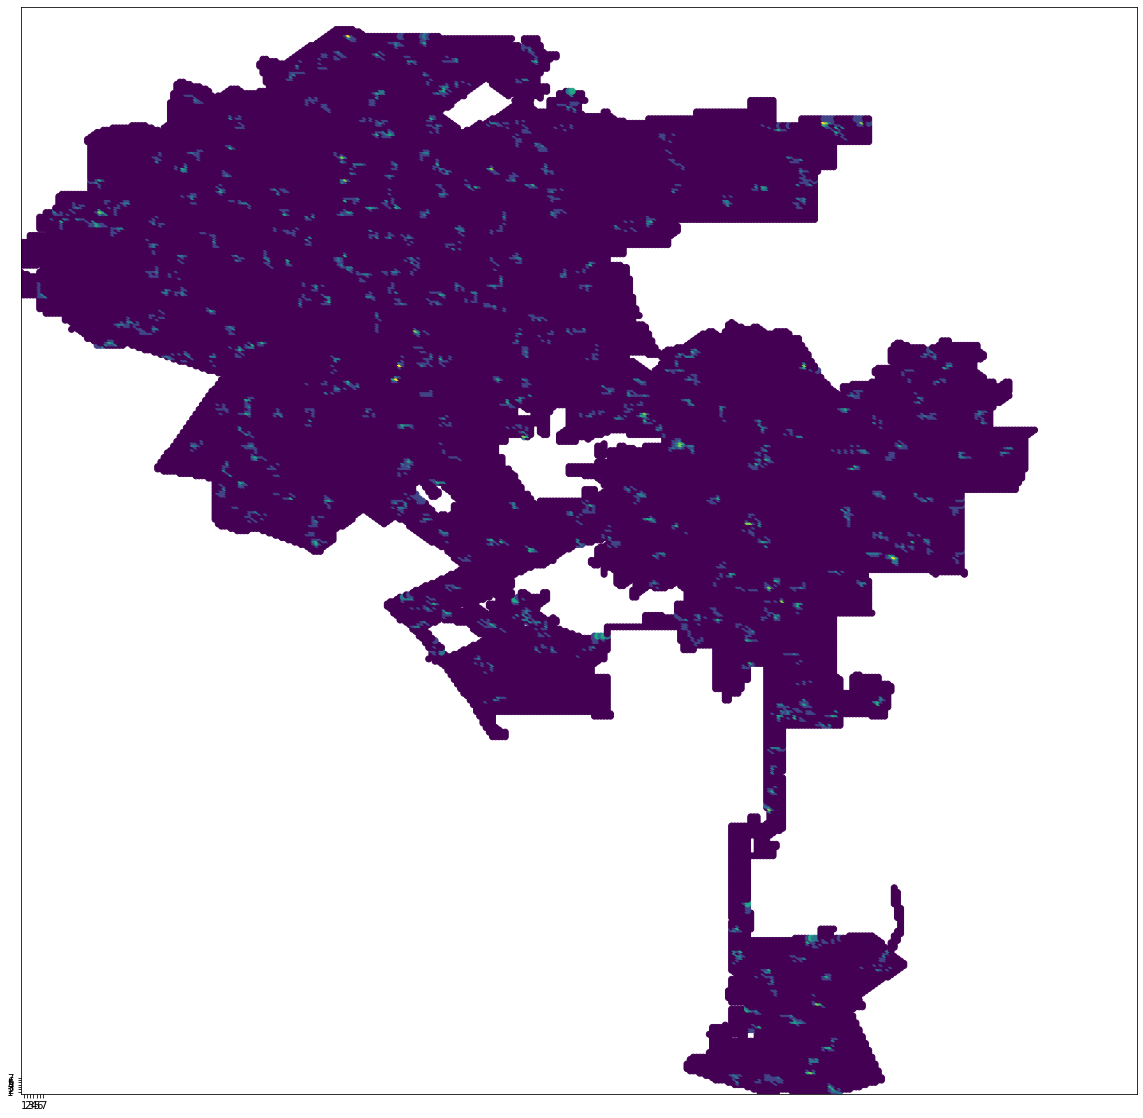

In [1]:
import models

# simple random model with precincts
models.main()

In [ ]:
# test to determine population of entire